In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from datetime import datetime
from hts import HTSRegressor
from hts.utilities.load_data import load_hierarchical_sine_data
import hts.functions
import collections
from hts.hierarchy import HierarchyTree

## Hierarchical ARIMA by ags2 and ags5 

In [18]:
df = pd.read_csv('./../final_dfs/for_modeling/df_final_date_wide.csv', converters={'ags2': str, 'ags5': str}) 
df = df[['ags2','ags5','unemployment_rate', 'date']]

create dictionary to specify hierarcy: 

In [19]:
d = df.groupby('ags2')['ags5'].apply(lambda x: list(set(x))).to_dict()
d

{'01': ['01002',
  '01003',
  '01058',
  '01059',
  '01060',
  '01062',
  '01054',
  '01061',
  '01053',
  '01004',
  '01056',
  '01001',
  '01057',
  '01051',
  '01055'],
 '02': ['02000'],
 '03': ['03352',
  '03459',
  '03155',
  '03257',
  '03454',
  '03460',
  '03403',
  '03101',
  '03354',
  '03359',
  '03353',
  '03404',
  '03158',
  '03456',
  '03254',
  '03356',
  '03159',
  '03241',
  '03361',
  '03103',
  '03351',
  '03358',
  '03256',
  '03153',
  '03251',
  '03357',
  '03355',
  '03401',
  '03462',
  '03157',
  '03252',
  '03102',
  '03402',
  '03405',
  '03455',
  '03461',
  '03255',
  '03452',
  '03453',
  '03154',
  '03451',
  '03457',
  '03151',
  '03458',
  '03360'],
 '04': ['04011', '04012'],
 '05': ['05112',
  '05370',
  '05758',
  '05120',
  '05513',
  '05162',
  '05117',
  '05122',
  '05362',
  '05766',
  '05954',
  '05958',
  '05774',
  '05770',
  '05762',
  '05113',
  '05314',
  '05962',
  '05114',
  '05366',
  '05913',
  '05978',
  '05515',
  '05966',
  '05378',


In [20]:
level_names = ['ags2', 'ags5']
hierarchy = [['ags2']]
df_wide, sum_mat, sum_mat_labels = hts.functions.get_hierarchichal_df(df,
                                                                    level_names=level_names,
                                                                    hierarchy=hierarchy,
                                                                    date_colname='date',
                                                                    val_colname='unemployment_rate')
df_wide

ags2_ags5,01_01001,01_01002,01_01003,01_01004,01_01051,01_01053,01_01054,01_01055,01_01056,01_01057,...,07,08,09,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,8.2,7.9,7.8,8.3,6.4,4.9,6.3,6.3,4.8,4.7,...,176.2,143.9,321.1,33.4,8.1,126.3,67.2,80.1,113.0,136.0
2019-02-01,7.8,7.7,7.6,8.2,6.3,5.0,6.3,6.2,4.8,4.5,...,174.3,140.8,315.6,33.2,7.9,125.2,66.3,79.0,111.3,133.3
2019-03-01,7.8,7.8,7.5,8.0,6.0,4.8,5.5,5.6,4.6,4.3,...,169.3,137.8,292.0,32.5,7.8,118.5,62.5,75.8,106.3,127.6
2019-04-01,7.6,7.6,7.4,7.9,5.5,4.6,4.5,4.8,4.5,4.0,...,164.4,134.8,265.7,31.9,7.7,111.8,57.2,71.2,100.0,121.2
2019-05-01,7.7,7.7,7.3,8.0,5.2,4.6,4.2,4.5,4.5,3.9,...,163.1,134.0,257.8,31.9,7.8,110.6,55.0,69.4,99.8,120.1
2019-06-01,7.7,7.6,7.1,7.9,5.0,4.5,4.1,4.4,4.5,3.8,...,163.6,133.2,253.1,31.9,7.8,108.5,53.8,67.9,97.7,117.9
2019-07-01,8.1,7.8,7.4,8.0,5.2,4.8,4.3,4.6,4.7,4.0,...,171.0,136.0,259.1,33.7,8.0,110.8,53.9,68.6,98.7,120.5
2019-08-01,8.3,7.8,7.3,7.9,5.3,4.7,4.1,4.5,4.5,3.9,...,169.6,147.3,283.3,33.5,8.0,109.0,54.1,69.6,100.0,122.5
2019-09-01,8.3,7.4,7.1,7.6,5.1,4.6,4.0,4.3,4.3,3.8,...,162.6,142.3,271.0,32.6,7.8,105.9,52.3,66.9,94.6,116.8


Index(['01_01001', '01_01002', '01_01003', '01_01004', '01_01051', '01_01053',
       '01_01054', '01_01055', '01_01056', '01_01057',
       ...
       '16068', '16069', '16070', '16071', '16072', '16073', '16074', '16075',
       '16076', '16077'],
      dtype='object', name='ags2_ags5', length=819)

add columns with the total and sum for each bundesland: 

In [113]:
#df_wide['total'] = df_wide.sum(axis=1)
#for key in d.keys():
#    df_wide[key] = df_wide[[col for col in df_wide.columns if col.startswith(key)]].sum(axis=1)

In [21]:
df_wide.index = pd.to_datetime(df_wide.index)

add total to dict:

In [22]:
d['total'] = list(d.keys())

In [23]:
d

{'01': ['01002',
  '01003',
  '01058',
  '01059',
  '01060',
  '01062',
  '01054',
  '01061',
  '01053',
  '01004',
  '01056',
  '01001',
  '01057',
  '01051',
  '01055'],
 '02': ['02000'],
 '03': ['03352',
  '03459',
  '03155',
  '03257',
  '03454',
  '03460',
  '03403',
  '03101',
  '03354',
  '03359',
  '03353',
  '03404',
  '03158',
  '03456',
  '03254',
  '03356',
  '03159',
  '03241',
  '03361',
  '03103',
  '03351',
  '03358',
  '03256',
  '03153',
  '03251',
  '03357',
  '03355',
  '03401',
  '03462',
  '03157',
  '03252',
  '03102',
  '03402',
  '03405',
  '03455',
  '03461',
  '03255',
  '03452',
  '03453',
  '03154',
  '03451',
  '03457',
  '03151',
  '03458',
  '03360'],
 '04': ['04011', '04012'],
 '05': ['05112',
  '05370',
  '05758',
  '05120',
  '05513',
  '05162',
  '05117',
  '05122',
  '05362',
  '05766',
  '05954',
  '05958',
  '05774',
  '05770',
  '05762',
  '05113',
  '05314',
  '05962',
  '05114',
  '05366',
  '05913',
  '05978',
  '05515',
  '05966',
  '05378',


create tree to hierarcy:

In [24]:
ht = HierarchyTree.from_nodes(d, df_wide)
print(ht)

KeyError: "None of [Index(['01002'], dtype='object', name='ags2_ags5')] are in the [columns]"

train the model: 

In [25]:
hp = HTSRegressor(model='auto_arima', revision_method='OLS', n_jobs=0)
hp.fit(df_wide, d)

KeyError: "None of [Index(['01002'], dtype='object', name='ags2_ags5')] are in the [columns]"

try another approach to train the model: 

In [26]:
hp = HTSRegressor(model='sarimax', revision_method='BU', n_jobs=0, order=(2,1,2))
hp.fit(df_wide, d)

KeyError: "None of [Index(['01002'], dtype='object', name='ags2_ags5')] are in the [columns]"

In [119]:
predicted = hp.predict(steps_ahead=8)

Fitting models: 100%|██████████| 418/418 [00:01<00:00, 381.10it/s]


In [120]:
predicted

,total,01,02,03,04,05,06,07,08,09,...,16073,16055,16071,16072,16067,16061,16052,16063,16056,16054
2019-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-02-01,2048.700040,202.200004,200.700004,130.800002,161.400007,220.200004,164.000003,148.200003,338.300007,214.000003,...,5.900000,6.300000,4.500000,4.200000,5.400000,4.500000,8.600000,4.200000,6.900000,5.500000
2019-03-01,2015.498578,198.573550,197.303199,128.713972,158.284542,217.100536,162.606485,145.686263,331.534076,209.024903,...,5.900000,5.815992,4.375772,3.951609,5.400000,4.390950,8.494619,4.084885,6.650464,5.250671
2019-04-01,1927.777740,190.950331,190.063374,124.595531,150.656452,208.520822,160.269130,140.751211,303.744665,202.928448,...,5.628022,6.003001,4.168478,3.667304,5.147970,4.095147,8.421526,3.998753,6.612677,5.336479
2019-05-01,1854.510547,183.726023,183.061966,119.475891,142.447785,201.556299,159.358285,135.797724,280.870069,195.568626,...,5.209141,5.591189,3.988924,3.760755,5.160980,3.837321,8.216828,3.764195,6.339863,5.168087
2019-06-01,1857.909192,184.299928,184.766288,119.421739,143.192666,202.108438,161.021377,136.816045,280.246883,196.370155,...,5.418557,5.978144,3.933861,3.627257,4.897027,3.885435,8.285844,3.957624,6.330865,4.672236
2019-07-01,1823.868190,180.794527,178.854124,116.991679,140.269665,197.606919,159.618371,134.174836,272.041082,192.310248,...,4.979371,5.554659,3.803220,3.617519,4.944224,3.550559,8.014765,3.726042,6.571183,4.904899
2019-08-01,1900.892326,187.276071,185.819157,120.993289,145.993273,204.880017,165.397116,142.882851,279.978071,198.210630,...,5.400265,5.881009,4.024398,3.765853,5.242092,4.088679,8.238261,3.980929,6.598973,4.916269
2019-09-01,1904.453737,187.461007,185.355593,119.943939,143.628284,200.538836,165.906288,136.695712,301.661884,209.469022,...,5.105789,5.860078,3.997365,3.772511,4.882334,3.705456,8.306942,4.088853,6.745745,4.679832
2019-10-01,1817.438975,178.247071,174.917535,115.664758,138.864470,195.124886,160.172424,134.938131,276.491196,196.398046,...,4.898368,5.418651,3.758724,3.826626,4.969906,3.567473,8.007133,3.833900,6.136315,4.772276


Calaulate in sample MSE for the kreise

In [121]:
resid = hp.hts_result.residuals
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict

resid = entries_to_remove(list(d.keys()), resid)
resid = list(resid.values()) 
resid = [item for sublist in resid for item in sublist]
(np.array(resid)**2).mean()

1.157143358802759

In [122]:
states = df["ags2"].unique().tolist()
states

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

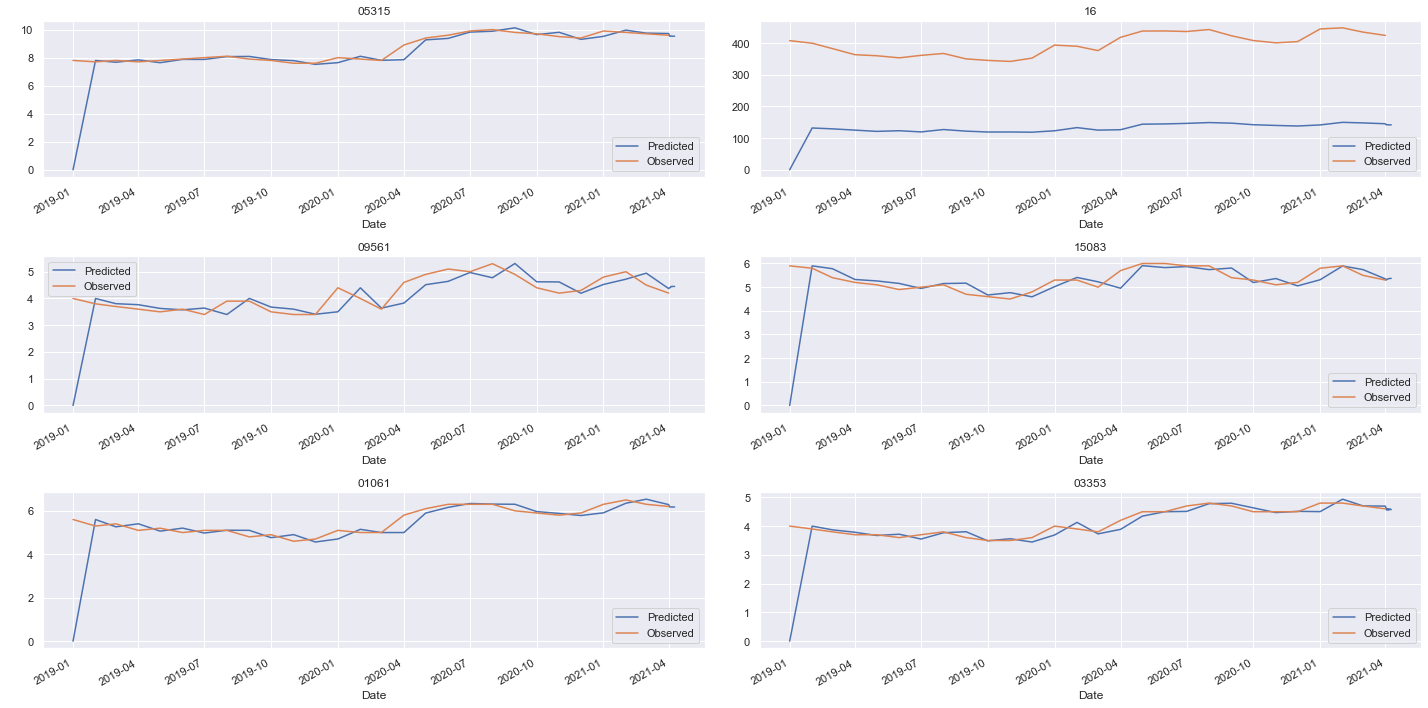

In [123]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

def plot_results(cols, axes, preds):
    axes = np.hstack(axes)
    for ax, col in zip(axes, cols):
        preds[col].plot(ax=ax, label="Predicted")
        df_wide[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel(" ")
    
plot_results(['05315','16','09561','15083','01061','03353'], axes, predicted_autoarima)
plt.tight_layout()

## Try multivariate (dont read that, only a draft): 

In [124]:
exogenous = {k: ['unemployment_rate', 'number_of_companies_administration'] for k in df.columns if k not in ['unemployment_rate', 'number_of_companies_administration']}
ht = HierarchyTree.from_nodes(d, df, exogenous=exogenous)
print(ht)

KeyError: "None of [Index(['total'], dtype='object')] are in the [columns]"

In [ ]:
resid = hp.hts_result.residuals
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict

resid = entries_to_remove(list(d.keys()), resid)
resid = list(resid.values()) 
resid = [item for sublist in resid for item in sublist]
(np.array(resid)**2).mean()

In [ ]:
df = pd.read_csv('./../final_dfs/for_modeling/df_final_date_wide.csv', converters={'ags2': str, 'ags5': str}) 
df = df[['ags2','ags5','unemployment_rate', 'date', 'number_of_companies_administration']]

In [ ]:
level_names = ['ags2', 'ags5']
hierarchy = [['ags2'], ['ags5']]
df_wide, sum_mat, sum_mat_labels = hts.functions.get_hierarchichal_df(df,
                                                                    level_names=level_names,
                                                                    hierarchy=hierarchy,
                                                                    date_colname='date',
                                                                    val_colname=['unemployment_rate','number_of_companies_administration'])
df_wide